In [2]:
import numpy as np
import mnist_reader
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import mnist_reader
import seaborn as sns
import pandas as pd

# PCA

# 1. 讀取資料
x_train, y_train = mnist_reader.load_data('data/oracle', kind='train')
x_test, y_test = mnist_reader.load_data('data/oracle', kind='t10k')
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
components_list = [2, 4, 8]
pca_results = {}

for n_components in components_list:    
    # 執行 PCA
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    # 儲存 PCA 結果
    pca_results[n_components] = {
        "pca_model": pca,
        "x_train_pca": x_train_pca,
        "x_test_pca": x_test_pca,
    }



The size of train set: 27222
The size of t10k set: 3000


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# PCA + K-mean clustering

cluster_results = {}  # 用來儲存分群結果與 ARI 指標

for n_components, data in pca_results.items():
    x_pca = data["x_train_pca"]

    # 使用 KMeans 做 clustering，K=10 模擬 10 個數字類別
    kmeans = KMeans(n_clusters=10, random_state=42)
    cluster_labels = kmeans.fit_predict(x_pca)

    # 計算 clustering 效果
    ari = adjusted_rand_score(y_train, cluster_labels)

    # 儲存結果
    cluster_results[n_components] = {
        "kmeans_model": kmeans,
        "cluster_labels": cluster_labels,
        "ari": ari
    }

    print(f"PCA={n_components}: ARI={ari:.4f}")


PCA=2: ARI=0.0688
PCA=4: ARI=0.0768
PCA=8: ARI=0.0797


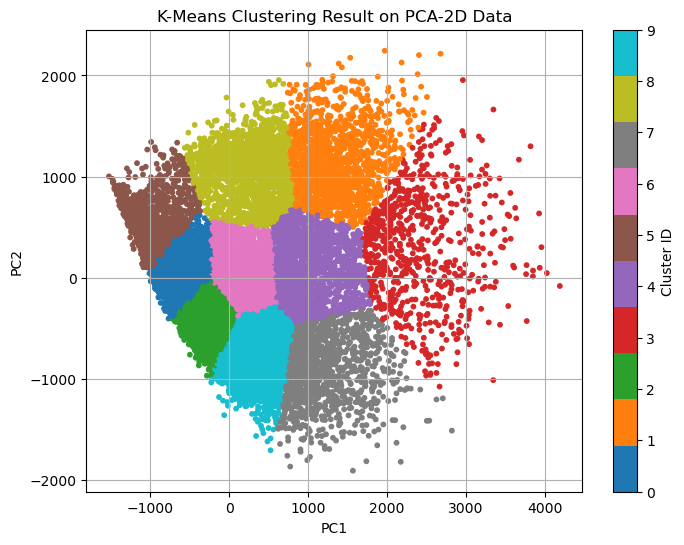

In [7]:
import matplotlib.pyplot as plt

x_pca = pca_results[2]["x_train_pca"]
cluster_labels = cluster_results[2]["cluster_labels"]

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title("K-Means Clustering Result on PCA-2D Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.colorbar(label="Cluster ID")
plt.savefig("../results/pca_K-means_output/kmeans_cluster_pca2.png")
plt.show()


In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

em_cluster_results = {}  # 儲存 EM clustering 結果與 ARI

for n_components, data in pca_results.items():
    x_pca = data["x_train_pca"]

    # 使用 Gaussian Mixture Model (EM)
    gmm = GaussianMixture(n_components=10, random_state=42)
    gmm.fit(x_pca)
    cluster_labels = gmm.predict(x_pca)

    # 計算 clustering 效果
    ari = adjusted_rand_score(y_train, cluster_labels)

    # 儲存結果
    em_cluster_results[n_components] = {
        "gmm_model": gmm,
        "cluster_labels": cluster_labels,
        "ari": ari
    }

    print(f"[GMM] PCA={n_components}: ARI={ari:.4f}")


[GMM] PCA=2: ARI=0.0758
[GMM] PCA=4: ARI=0.0841
[GMM] PCA=8: ARI=0.0914


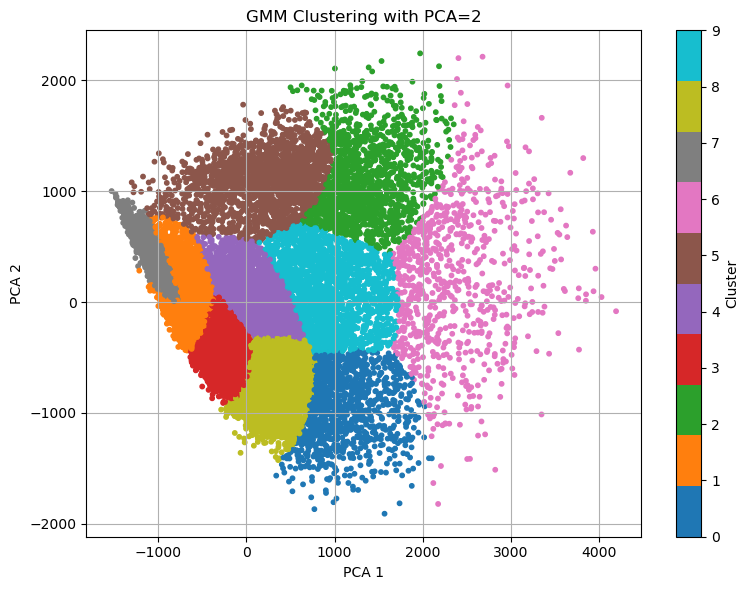

In [5]:
import matplotlib.pyplot as plt

# 選擇要繪製的 PCA 維度數（例如：2 維）
target_pca_dim = 2
x_pca = pca_results[target_pca_dim]["x_train_pca"]
cluster_labels = em_cluster_results[target_pca_dim]["cluster_labels"]

# 畫圖
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title(f'GMM Clustering with PCA={target_pca_dim}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()
